In [ ]:
#importing necessarry variables 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 


In [ ]:
#importing the dataset
df = pd.read_excel("South_Wales.xlsx")
df.head()

Crime ID      Month  \
0  763ab4fcc29a6a4507bed8435e2fcbcd0615fcd7a3b21d... 2021-01-01   
1  cd67b4def52ad4ebc875b7cb29087ef9e38d383a3cb426... 2021-01-01   
2  aebaae1694b89223d7d8cc12ffb9626d1ef8a9926722b1... 2021-01-01   
3  3713fb2cfceb9f5828454f4cd00c737a5a3af8c908b042... 2021-01-01   
4  d047960e76243a06c77f1a711316526ab6bcde8b404893... 2021-01-01   

          Reported by        Falls within  Longitude   Latitude  \
0  South Wales Police  South Wales Police  -3.156006  51.766526   
1  South Wales Police  South Wales Police  -3.245889  51.776739   
2  South Wales Police  South Wales Police  -3.659547  51.639766   
3  South Wales Police  South Wales Police  -3.658828  51.634723   
4  South Wales Police  South Wales Police  -3.658223  51.639129   

                       Location  LSOA code           LSOA name  \
0         On or near Southlands  W01001444  Blaenau Gwent 005B   
1          On or near Nightclub  W01001481  Blaenau Gwent 006E   
2    On or near Teras Griffiths  W01000991       Bridgend 001A   
3       On or near Tudor Estate  W01000991       Bridgend 001A   
4  On or near Hartshorn Terrace  W01000991       Bridgend 001A   

                     Crime type        Last outcome category  
0                   Other crime  Unable to prosecute suspect  
1  Violence and sexual offences    Status update unavailable  
2                      Burglary  Unable to prosecute suspect  
3                         Drugs       Awaiting court outcome  
4                   Other theft    Status update unavailable

In [ ]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category'],
      dtype='object')

In [ ]:
df.describe()

Longitude       Latitude
count  197192.000000  197192.000000
mean       -3.465660      51.567419
std         0.302063       0.096324
min        -4.973247      50.495334
25%        -3.763914      51.485320
50%        -3.376265      51.544808
75%        -3.190724      51.641790
max         0.548072      53.930714

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202867 entries, 0 to 202866
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Crime ID               202867 non-null  object        
 1   Month                  202867 non-null  datetime64[ns]
 2   Reported by            202867 non-null  object        
 3   Falls within           202867 non-null  object        
 4   Longitude              197192 non-null  float64       
 5   Latitude               197192 non-null  float64       
 6   Location               202867 non-null  object        
 7   LSOA code              197192 non-null  object        
 8   LSOA name              197192 non-null  object        
 9   Crime type             202867 non-null  object        
 10  Last outcome category  202867 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 17.0+ MB


In [ ]:
#months with the highest number of crimes count
df['Month'].value_counts().sort_values(ascending=False)

2022-08-01    9784
2022-10-01    9744
2021-07-01    9544
2022-05-01    9483
2021-08-01    9472
2021-06-01    9461
2021-10-01    9435
2021-09-01    9287
2022-09-01    9079
2021-05-01    9076
2021-11-01    9056
2022-11-01    9012
2022-03-01    8964
2022-07-01    8914
2022-06-01    8884
2022-04-01    8502
2021-03-01    8431
2021-04-01    8408
2022-01-01    8263
2021-12-01    8090
2022-02-01    8027
2021-01-01    7144
2021-02-01    6807
Name: Month, dtype: int64

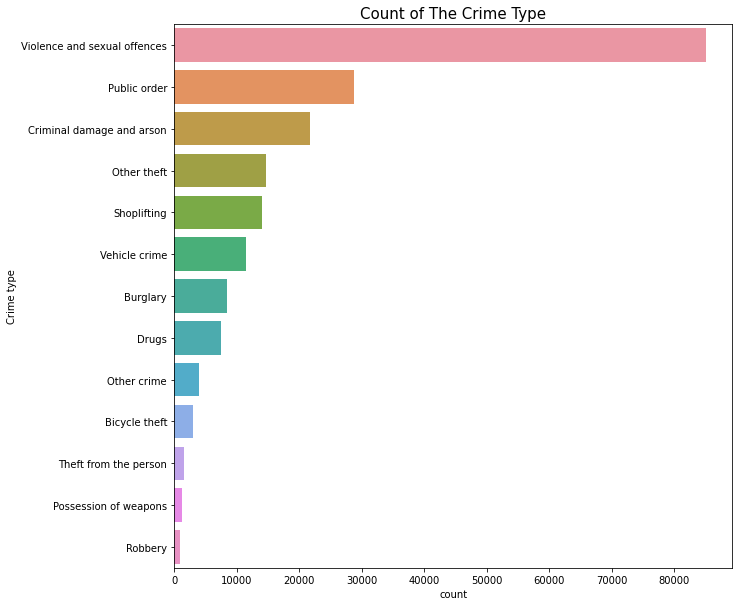

In [ ]:
df_new = df
plt.figure(figsize=(10,10))
sns.countplot(data=df_new, y='Crime type', order=df_new['Crime type'].value_counts().index)
plt.title('Count of The Crime Type', fontsize=15)
plt.show()

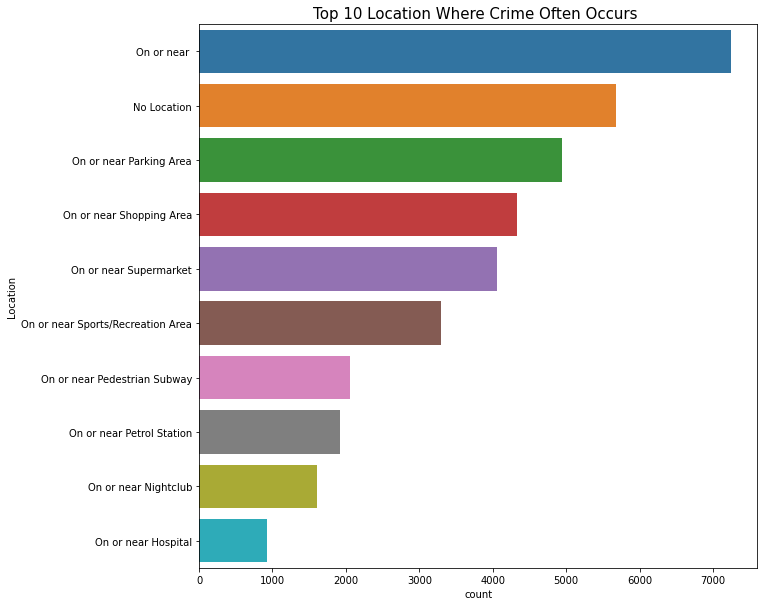

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_new, y='Location', order=df_new['Location'].value_counts().index[:10])
plt.title('Top 10 Location Where Crime Often Occurs ', fontsize=15)
plt.show()

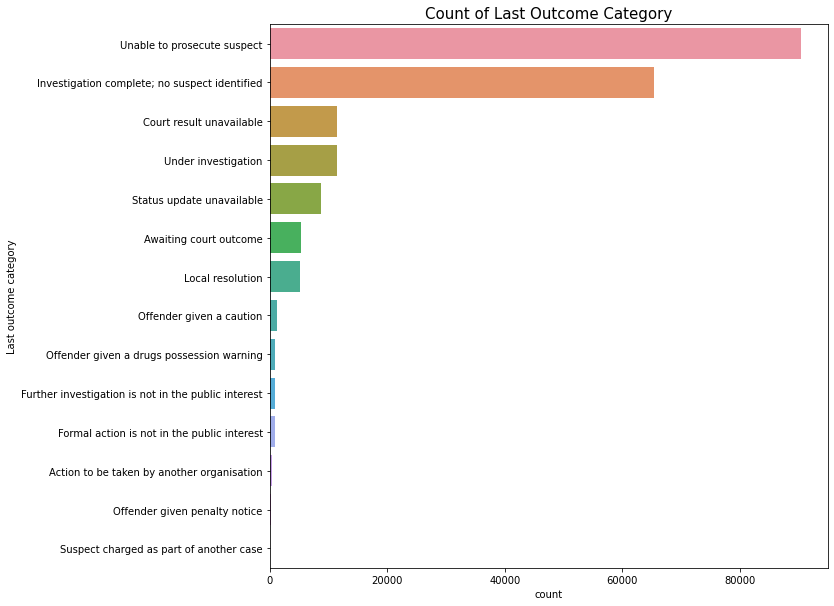

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_new, y='Last outcome category', order=df_new['Last outcome category'].value_counts().index)
plt.title('Count of Last Outcome Category', fontsize=15)
plt.show()

In [ ]:
df_new['Location'].value_counts().index[:10]

Index(['On or near ', 'No Location', 'On or near Parking Area',
       'On or near Shopping Area', 'On or near Supermarket',
       'On or near Sports/Recreation Area', 'On or near Pedestrian Subway',
       'On or near Petrol Station', 'On or near Nightclub',
       'On or near Hospital'],
      dtype='object')

In [ ]:
df_top3_loc = df_new.query("Location in ('On or near Supermarket', 'On or near Parking Area','On or near Shopping Area')")

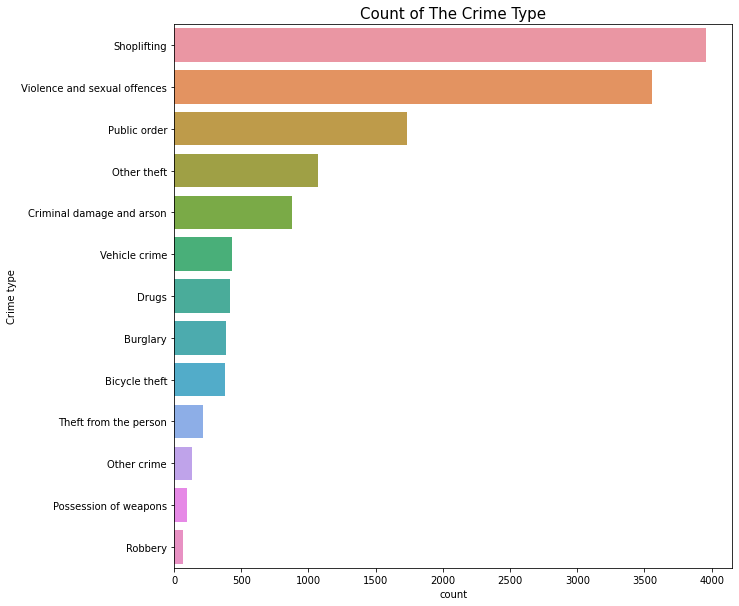

In [ ]:
# What type of crimes often occur in the top 3 locations ?
plt.figure(figsize=(10,10))
sns.countplot(data=df_top3_loc, y='Crime type', order=df_top3_loc['Crime type'].value_counts().index)
plt.title('Count of The Crime Type', fontsize=15)
plt.show()

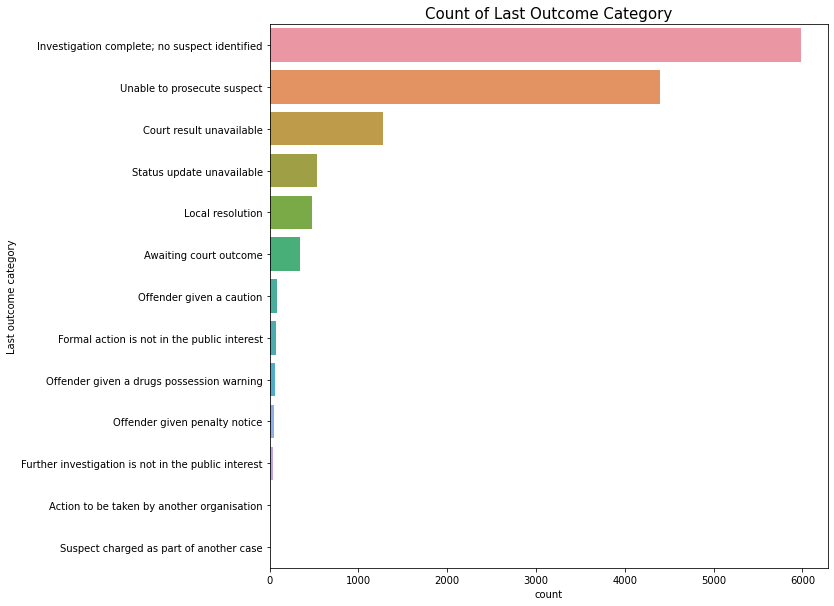

In [ ]:
# What the last outcome that often appears in the top 3 locations ?
plt.figure(figsize=(10,10))
sns.countplot(data=df_top3_loc, y='Last outcome category', order=df_top3_loc['Last outcome category'].value_counts().index)
plt.title('Count of Last Outcome Category', fontsize=15)
plt.show()

In [ ]:
df_top3_loc_SM = df_top3_loc[df_top3_loc['Location']=='On or near Supermarket']

In [ ]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
crs = {'init' : 'epsg:4326'}
geo = [Point(xy) for xy in zip(df_top3_loc_SM['Longitude'], df_top3_loc_SM['Latitude'])]
geo_df = gpd.GeoDataFrame(df_top3_loc_SM, crs=crs, geometry=geo)
geo_df.head(2)

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Crime ID      Month  \
70   741807d9306efa9417835e38212271857ee27f5e5ee8e5... 2021-01-01   
236  630ea1b007adf27fa05339a19bba5011867d85bbc134e1... 2021-01-01   

            Reported by        Falls within  Longitude   Latitude  \
70   South Wales Police  South Wales Police  -3.661016  51.610359   
236  South Wales Police  South Wales Police  -3.500049  51.524252   

                   Location  LSOA code      LSOA name   Crime type  \
70   On or near Supermarket  W01001017  Bridgend 002C  Shoplifting   
236  On or near Supermarket  W01001004  Bridgend 009A  Shoplifting   

                             Last outcome category                   geometry  
70   Investigation complete; no suspect identified  POINT (-3.66102 51.61036)  
236  Investigation complete; no suspect identified  POINT (-3.50005 51.52425)

In [ ]:
datageo = gpd.read_file('Police_Force_Areas__December_2016__Generalised_Clipped_Boundaries_in_England_and_Wales.geojson')

In [ ]:
datageo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#  Top 3 Crime Type

In [ ]:
df_new = df_new.rename(columns={'Crime type':'CrimeType'})

In [ ]:
df_top3_crime = df_new.query("CrimeType in ('Violence and sexual offences', 'Anti-social behaviour','Criminal damage and arson')")

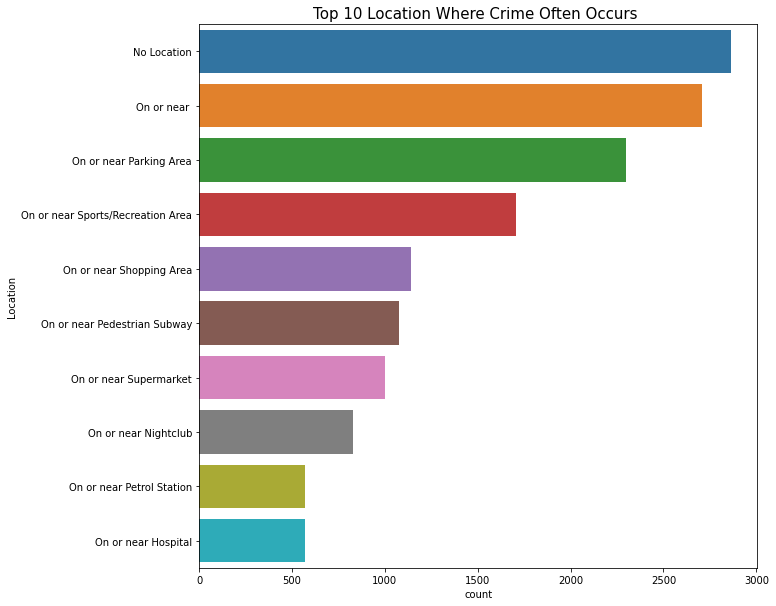

In [ ]:
# Location where this type of crime often occurs
plt.figure(figsize=(10,10))
sns.countplot(data=df_top3_crime, y='Location', order=df_top3_crime['Location'].value_counts().index[:10])
plt.title('Top 10 Location Where Crime Often Occurs ', fontsize=15)
plt.show()

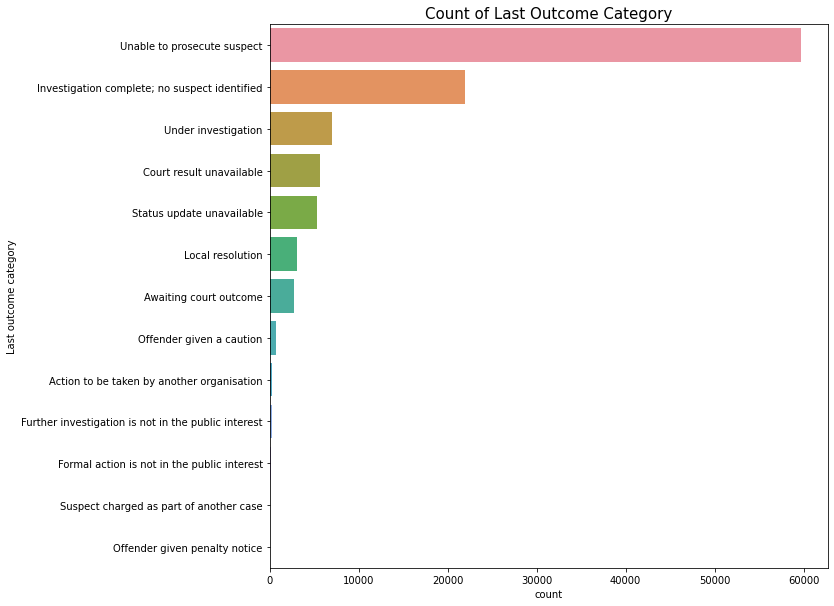

In [ ]:
# What the last outcome that often appears in the top 3 crime type ?
plt.figure(figsize=(10,10))
sns.countplot(data=df_top3_crime, y='Last outcome category', order=df_top3_crime['Last outcome category'].value_counts().index)
plt.title('Count of Last Outcome Category', fontsize=15)
plt.show()

In [ ]:
df_top3_crime.head()

Crime ID      Month  \
1   cd67b4def52ad4ebc875b7cb29087ef9e38d383a3cb426... 2021-01-01   
7   180f5c9f000b269bf76108623317a3197faa40bfdf4019... 2021-01-01   
10  1e959449626a2e655f390c660bf1e01ba200d13707b8fd... 2021-01-01   
13  360a05fa39b9a0c9194ba297a161d3fe40cd3d44d29fee... 2021-01-01   
14  1516878d0f61e04551a88a10b5a8f065afc2598f36034d... 2021-01-01   

           Reported by        Falls within  Longitude   Latitude  \
1   South Wales Police  South Wales Police  -3.245889  51.776739   
7   South Wales Police  South Wales Police  -3.658828  51.634723   
10  South Wales Police  South Wales Police  -3.647530  51.637562   
13  South Wales Police  South Wales Police  -3.655989  51.636130   
14  South Wales Police  South Wales Police  -3.653195  51.636790   

                    Location  LSOA code           LSOA name  \
1       On or near Nightclub  W01001481  Blaenau Gwent 006E   
7    On or near Tudor Estate  W01000991       Bridgend 001A   
10  On or near Albert Street  W01000992       Bridgend 001B   
13     On or near Dan-Y-Bryn  W01000992       Bridgend 001B   
14  On or near Treharne Road  W01000992       Bridgend 001B   

                       CrimeType  \
1   Violence and sexual offences   
7   Violence and sexual offences   
10     Criminal damage and arson   
13  Violence and sexual offences   
14  Violence and sexual offences   

                            Last outcome category  
1                       Status update unavailable  
7   Investigation complete; no suspect identified  
10                       Offender given a caution  
13                    Unable to prosecute suspect  
14                    Unable to prosecute suspect

# Random Analysis

In [ ]:
df_new['CrimeType'].unique()

array(['Other crime', 'Violence and sexual offences', 'Burglary', 'Drugs',
       'Other theft', 'Vehicle crime', 'Criminal damage and arson',
       'Public order', 'Shoplifting', 'Bicycle theft',
       'Possession of weapons', 'Robbery', 'Theft from the person'],
      dtype=object)

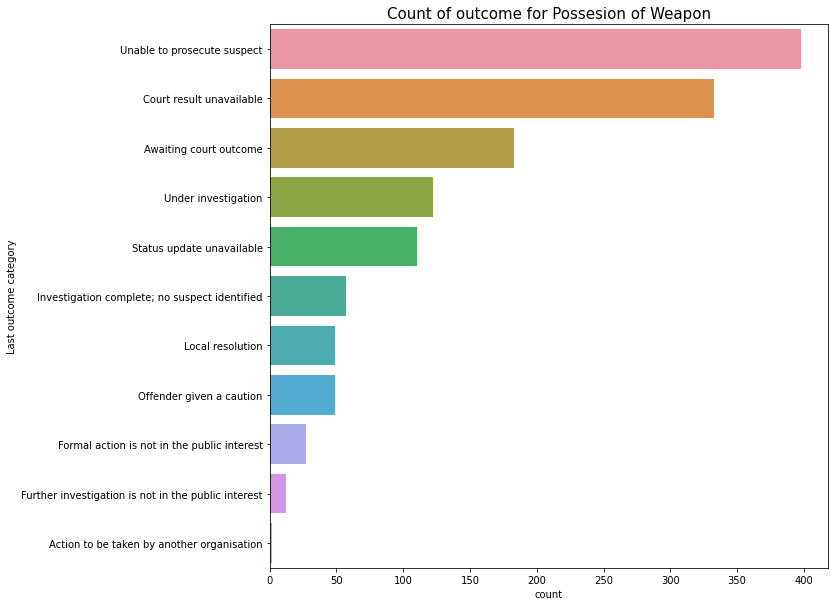

In [ ]:
# What is the most outcome for possession of weapons
plt.figure(figsize=(10,10))
data1 = df_new[df_new['CrimeType']=='Possession of weapons']
sns.countplot(data=data1, y='Last outcome category', order=data1['Last outcome category'].value_counts().index)
plt.title('Count of outcome for Possesion of Weapon', fontsize=15)
plt.show()

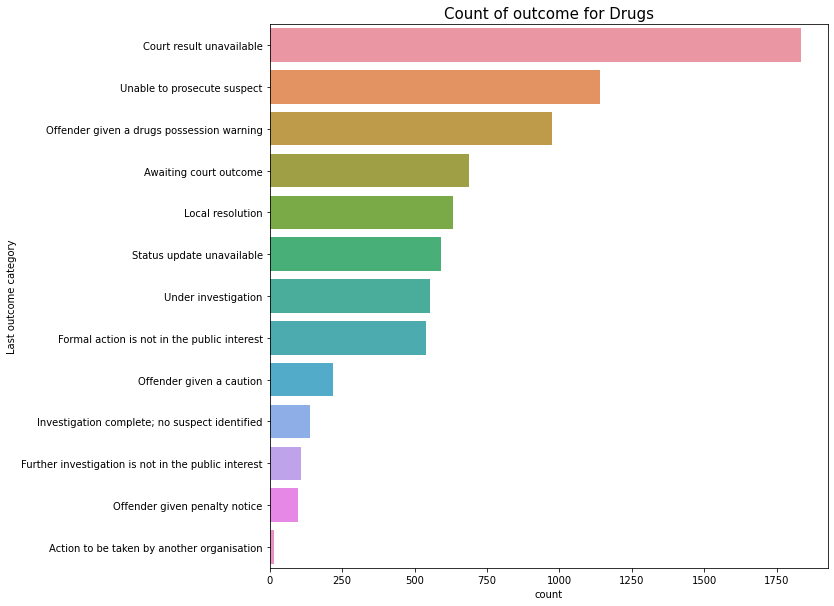

In [ ]:
# What is the most outcome for drugs
plt.figure(figsize=(10,10))
data1 = df_new[df_new['CrimeType']=='Drugs']
sns.countplot(data=data1, y='Last outcome category', order=data1['Last outcome category'].value_counts().index)
plt.title('Count of outcome for Drugs', fontsize=15)
plt.show()

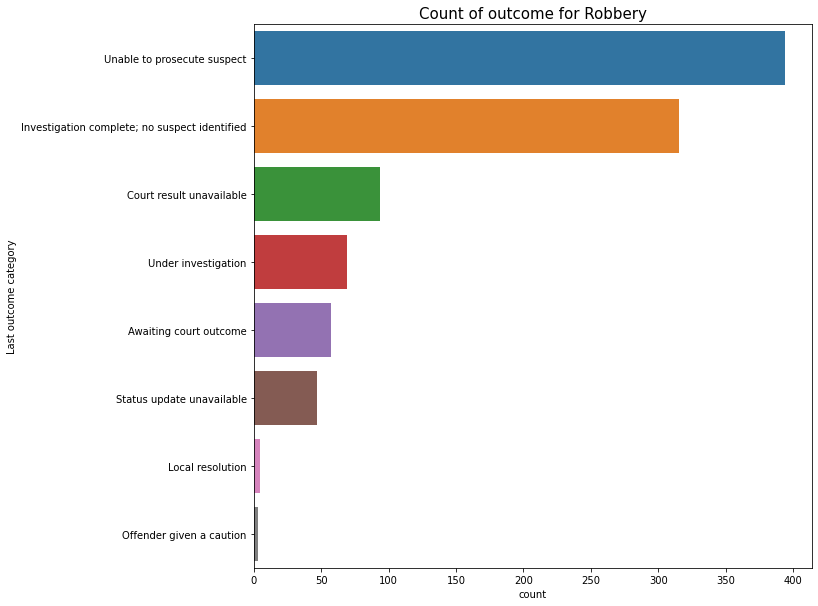

In [ ]:
# What is the most outcome for robbery
plt.figure(figsize=(10,10))
data1 = df_new[df_new['CrimeType']=='Robbery']
sns.countplot(data=data1, y='Last outcome category', order=data1['Last outcome category'].value_counts().index)
plt.title('Count of outcome for Robbery', fontsize=15)
plt.show()

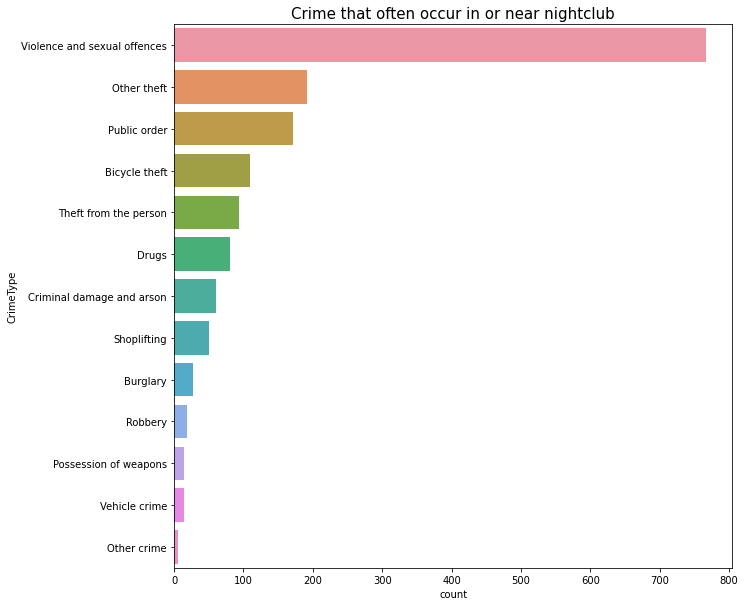

In [ ]:
# Crime that often occur in or near nightclub
plt.figure(figsize=(10,10))
data1 = df_new[df_new['Location']=='On or near Nightclub']
sns.countplot(data=data1, y='CrimeType', order=data1['CrimeType'].value_counts().index)
plt.title('Crime that often occur in or near nightclub', fontsize=15)
plt.show()

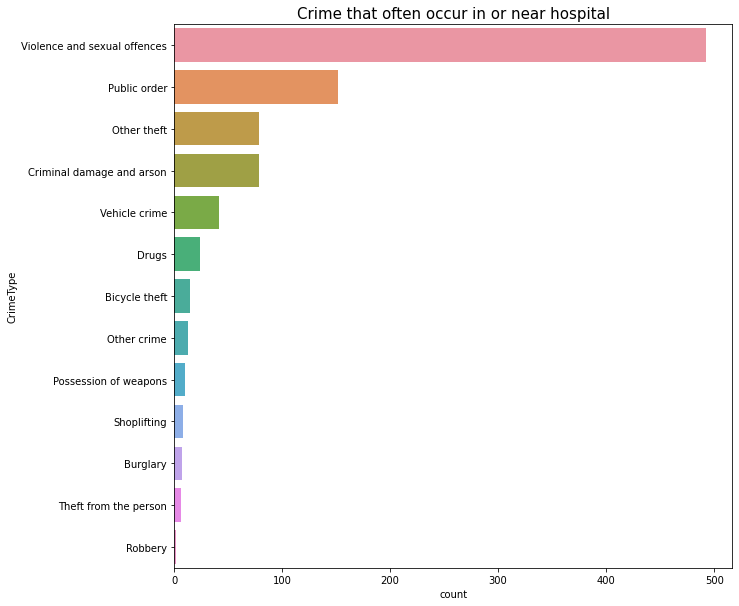

In [ ]:
# Crime that often occur in or near hospital
plt.figure(figsize=(10,10))
data1 = df_new[df_new['Location']=='On or near Hospital']
sns.countplot(data=data1, y='CrimeType', order=data1['CrimeType'].value_counts().index)
plt.title('Crime that often occur in or near hospital', fontsize=15)
plt.show()

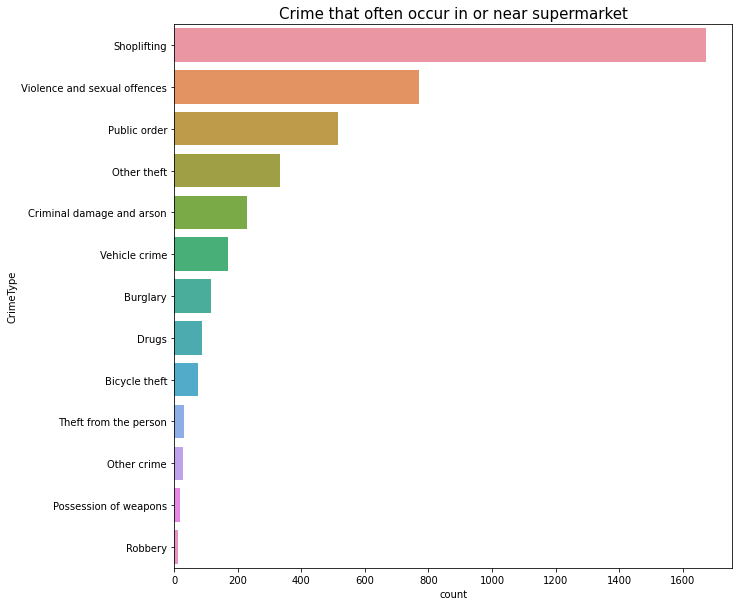

In [ ]:
# Crime that often occur in or near supermarket
plt.figure(figsize=(10,10))
data1 = df_new[df_new['Location']=='On or near Supermarket']
sns.countplot(data=data1, y='CrimeType', order=data1['CrimeType'].value_counts().index)
plt.title('Crime that often occur in or near supermarket', fontsize=15)
plt.show()

In [ ]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202867 entries, 0 to 202866
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Crime ID               202867 non-null  object        
 1   Month                  202867 non-null  datetime64[ns]
 2   Reported by            202867 non-null  object        
 3   Falls within           202867 non-null  object        
 4   Longitude              197192 non-null  float64       
 5   Latitude               197192 non-null  float64       
 6   Location               202867 non-null  object        
 7   LSOA code              197192 non-null  object        
 8   LSOA name              197192 non-null  object        
 9   Crime type             202867 non-null  object        
 10  Last outcome category  202867 non-null  object        
 11  Crime_Type_Num         202867 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), 

In [ ]:
df['By_Month'] = df['Month'].apply(lambda time: time.month)

In [ ]:
df['Day_of_Week'] = df['Month'].apply(lambda time: time.dayofweek)

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day_of_Week'] = df['Day_of_Week'].map(dmap)

In [ ]:
df['By_Month'] = df['By_Month'].map(dmap)

In [ ]:
BY_DAY_OF_WK = df.groupby('Day_of_Week').count()

In [ ]:
BY_DAY_OF_WK.head()

Crime ID  Month  Reported by  Falls within  Longitude  Latitude  \
Day_of_Week                                                                    
Fri             33995  33995        33995         33995      32911     32911   
Mon             34078  34078        34078         34078      33134     33134   
Sat             27083  27083        27083         27083      26364     26364   
Sun             18955  18955        18955         18955      18347     18347   
Thu             27031  27031        27031         27031      26321     26321   

             Location  LSOA code  LSOA name  Crime type  \
Day_of_Week                                               
Fri             33995      32911      32911       33995   
Mon             34078      33134      33134       34078   
Sat             27083      26364      26364       27083   
Sun             18955      18347      18347       18955   
Thu             27031      26321      26321       27031   

             Last outcome category  Crime_Type_Num  By_Month  
Day_of_Week                                                   
Fri                          33995           33995     15646  
Mon                          34078           34078     15238  
Sat                          27083           27083     17339  
Sun                          18955           18955      9483  
Thu                          27031           27031      8408

In [ ]:
BY_MONTH_DF = df.groupby('Month').count()
BY_MONTH_DF.head()

Crime ID  Reported by  Falls within  Longitude  Latitude  \
Month                                                                  
2021-01-01      7144         7144          7144       6970      6970   
2021-02-01      6807         6807          6807       6647      6647   
2021-03-01      8431         8431          8431       8207      8207   
2021-04-01      8408         8408          8408       8205      8205   
2021-05-01      9076         9076          9076       8848      8848   

            Location  LSOA code  LSOA name  Crime type  Last outcome category  \
Month                                                                           
2021-01-01      7144       6970       6970        7144                   7144   
2021-02-01      6807       6647       6647        6807                   6807   
2021-03-01      8431       8207       8207        8431                   8431   
2021-04-01      8408       8205       8205        8408                   8408   
2021-05-01      9076       8848       8848        9076                   9076   

            Crime_Type_Num  By_Month  Day_of_Week  
Month                                              
2021-01-01            7144      7144         7144  
2021-02-01            6807      6807         6807  
2021-03-01            8431      8431         8431  
2021-04-01            8408      8408         8408  
2021-05-01            9076      9076         9076

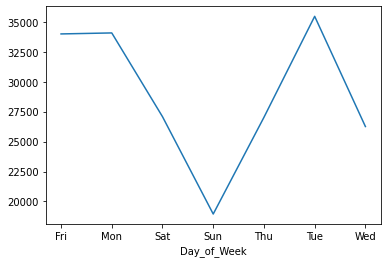

In [ ]:
BY_DAY_OF_WK['Crime ID'].plot()

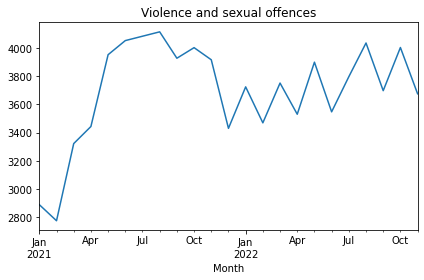

In [ ]:
df[df['Crime type']=='Violence and sexual offences'].groupby('Month').count()['Crime ID'].plot()
plt.title('Violence and sexual offences')
plt.tight_layout()

Text(0.5, 1.0, 'Top 5 Crimes Count Comparison')

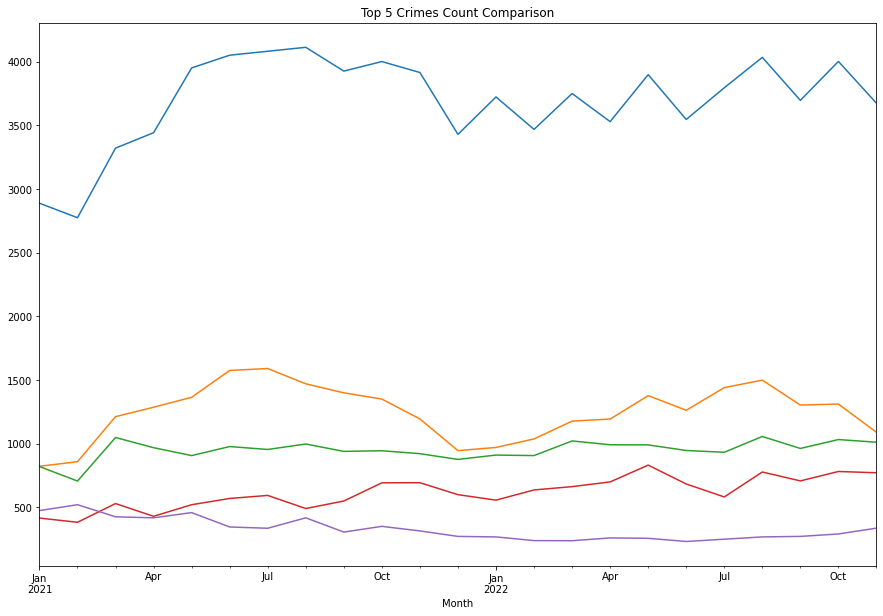

In [ ]:
plt.figure(figsize=(15,10))
df[df['Crime type']=='Violence and sexual offences'].groupby('Month').count()['Crime ID'].plot()
df[df['Crime type']=='Public order'].groupby('Month').count()['Crime ID'].plot()
df[df['Crime type']=='Criminal damage and arson'].groupby('Month').count()['Crime ID'].plot()
df[df['Crime type']=='Shoplifting'].groupby('Month').count()['Crime ID'].plot()
df[df['Crime type']=='Drugs'].groupby('Month').count()['Crime ID'].plot()
plt.title('Top 5 Crimes Count Comparison')

In [ ]:
#converting textual data in 'Crime type' column 
crime_data = df['Crime type']

# Create a dictionary to map the items in the list to numerical values
item_dict = {}
current_value = 1

for item in crime_data:
  if item not in item_dict:
    item_dict[item] = current_value
    current_value += 1

# Use the dictionary to convert the list to numerical values
numerical_data = [item_dict[item] for item in crime_data]

df['Crime_Type_Num'] = numerical_data


In [ ]:
#LSOA code
#converting textual data in 'LSOA CODE' column 
LSOA = df['LSOA code']

# Create a dictionary to map the items in the list to numerical values
item_dict = {}
current_value = 1

for item in LSOA:
  if item not in item_dict:
    item_dict[item] = current_value
    current_value += 1

# Use the dictionary to convert the list to numerical values
LSOA_num_data = [item_dict[item] for item in LSOA]

df['LSOA_num'] = LSOA_num_data

In [ ]:
#parsing the location data from the 'BY_MONTH' column 
loc_num  = BY_MONTH_DF['By_Month']

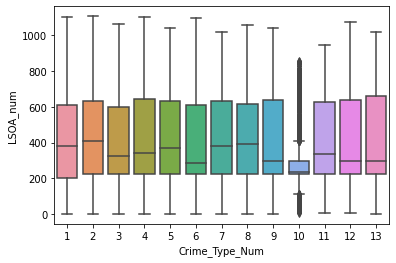

In [ ]:
sns.boxplot(data=df, x="Crime_Type_Num", y="LSOA_num")

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Calculate the count of unique values in the 'Column' column
value_counts = df['Crime type'].value_counts()

# Convert the value_counts object to a DataFrame
df_value_counts = value_counts.to_frame().reset_index()
df_value_counts.columns = ['Value', 'Count']

# Create a figure with a custom size
fig = go.Figure(data=[go.Pie(labels=df_value_counts['Value'], values=df_value_counts['Count'])])
fig.update_layout(title_text='Crime Type Visualization')
fig.show(config={'displayModeBar': False}, width=10, height=7)